In [ ]:
import requests
raw_html = requests.get("https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Colombia#Current_number_of_cases_by_department")

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup (raw_html.content, 'html.parser')

In [ ]:
department = soup.find_all(class_='wikitable')

for bootcamp in department:
  state = bootcamp.find_all('tr')

In [ ]:
import pandas as pd
data = pd.DataFrame(columns=['Department', 'Cases', 'Deaths', 'Recovered', 'Active Cases'])
data

,Department,Cases,Deaths,Recovered,Active Cases


In [ ]:

for i, thing in enumerate (state):
  nombres = thing.find_all_next('td')
  name= nombres[0].text.replace(",","").strip()
  cases= nombres[1].text.replace(",","").strip()
  deaths= nombres[2].text.replace(",","").strip()
  recovered= nombres[3].text.replace(",","").strip()
  active= nombres[4].text.replace("/n","").strip()




  data.loc[i] = [name,cases,deaths,recovered,active]


data.loc[34] = ["Colombia","1518067","40680","1382340","95047"]


In [ ]:
data = data.drop([0])


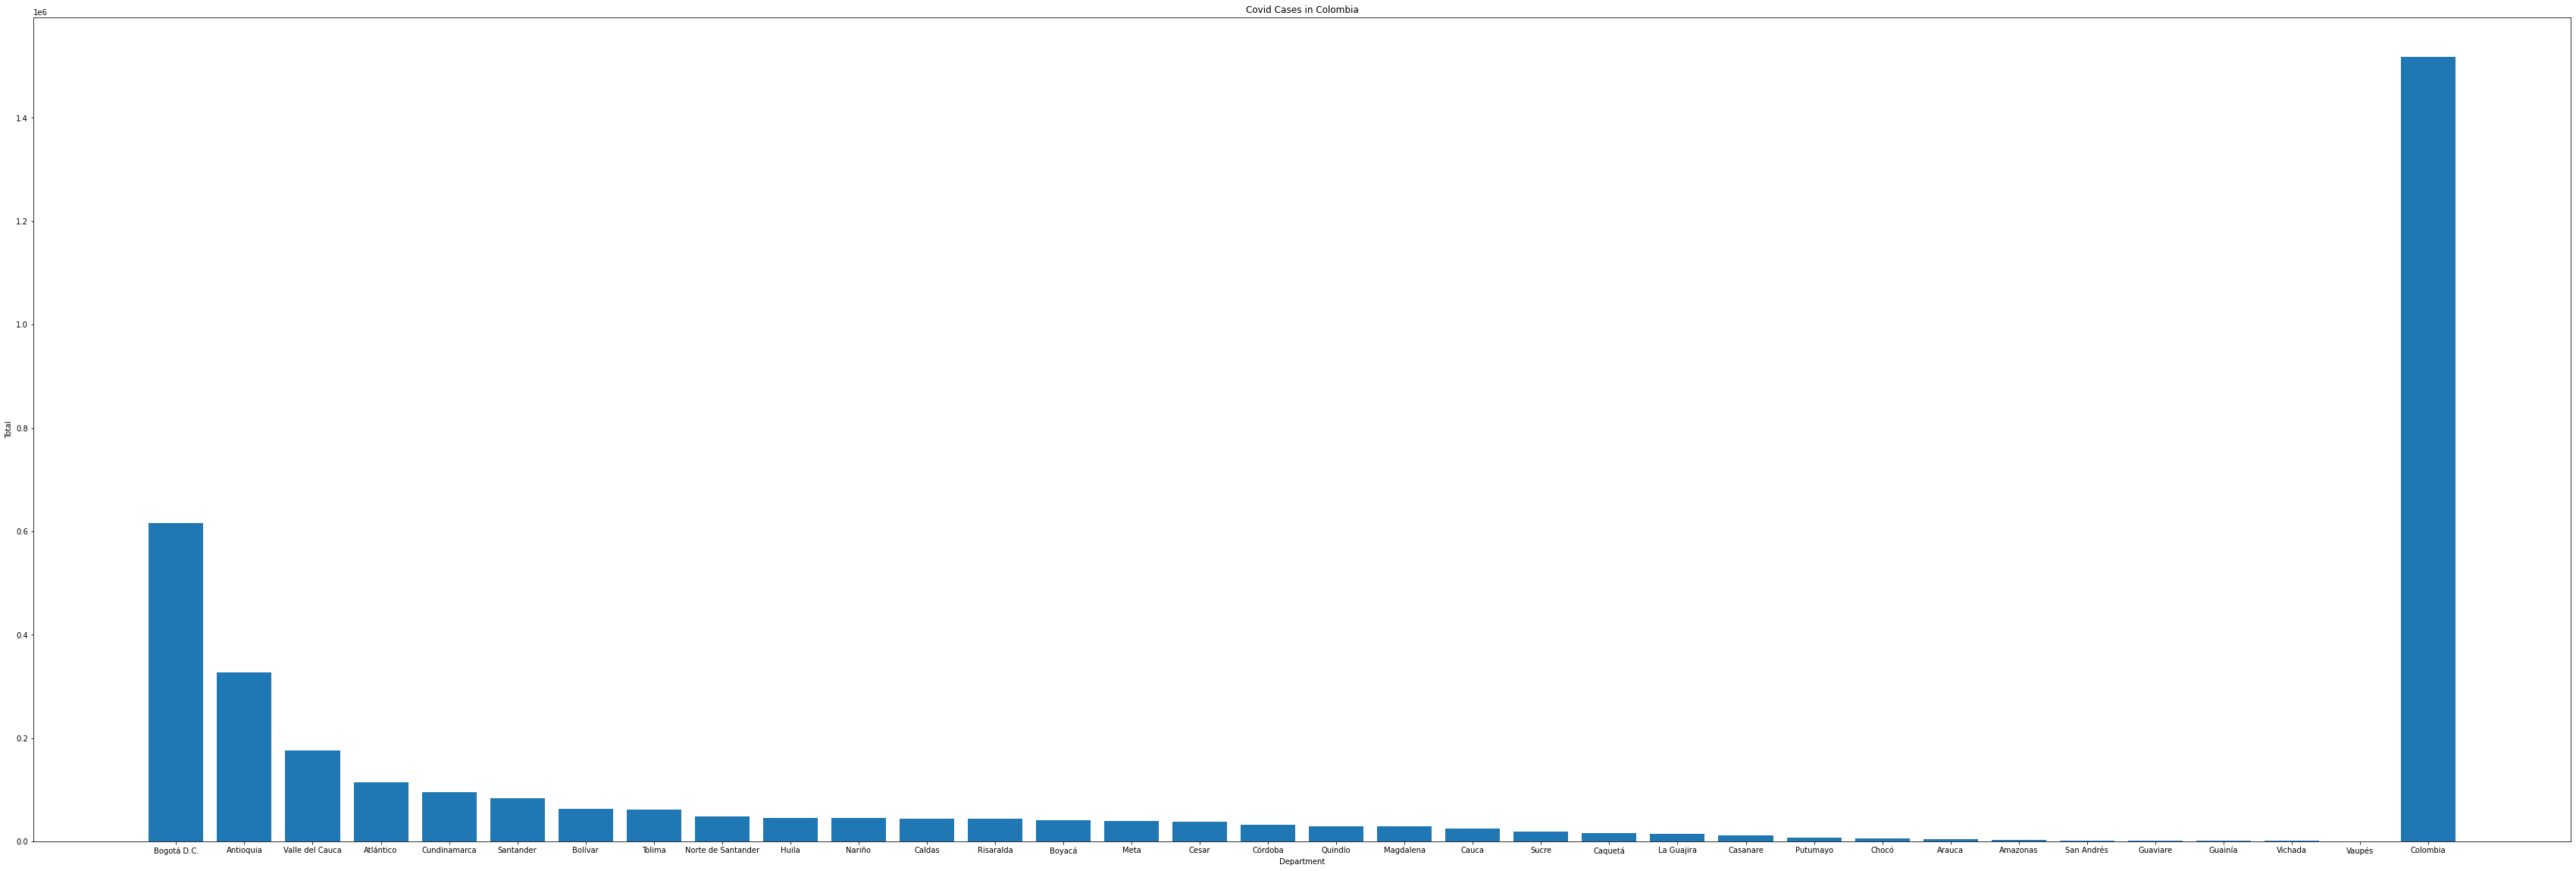

In [ ]:

data['Cases'] = pd.to_numeric(data['Cases'])

datas = data["Cases"]
lables = data["Department"]
from matplotlib import pyplot as plt
plt.figure(figsize = (60,20))
plt.xticks(range(len(datas)), lables)
plt.title("Covid Cases in Colombia")
plt.xlabel('Department')
plt.ylabel('Total')
plt.bar(range(len(datas)), datas)

plt.show()

